# Project Overview

- The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech   if it has a racist sentiment associated with it. So, the task is to classify racist tweets from other tweets.

- Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist and label '0'               denotes the tweet is not racist, the objective is to predict the labels on the test dataset.

# DataSet Overview

- For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file       with each line storing a tweet id, its label and the tweet.

# Importing Libraries

In [187]:
import pandas as pd  # for handling tabular data

import numpy as np  # for mathematical computing

import matplotlib.pyplot as plt  # for plotting charts and graphs

import seaborn as sns  # for advanced data visualization

import re  # for text analysis using (regular expressions) 

import string  # for string processing and character handling

import nltk  # for natural language processing (Natural language Toolkit)

# for inline plotting in Jupyter notebooks
%matplotlib inline  


# Reading and understanding the dataset

In [188]:
df = pd.read_csv(r'C:\Users\Mohamed dishesh\Downloads\NLP_Project\Twitter Sentiments.csv')

In [189]:
# display the first five rows of the DataFrame
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [190]:
# display the Last five rows of the DataFrame
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [191]:
# return the dimensions of the DataFrame
df.shape

(31962, 3)

- DataSet Have ==> 31962 Tweets -  3 Columns

In [192]:
# display concise information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [193]:
# Display the count of missing values in each column of the DataFrame
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

- The data has no missing values.

In [194]:
# generate descriptive statistics of the DataFrame
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [195]:
# Generate descriptive statistics for objecttype columns in the DataFrame
df.describe(include=['object'])

,tweet
count,31962
unique,29530
top,#model i love u take with u all the time in ...
freq,319


In [196]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

- Label 0 ==> the tweet is not racist
- Label 1 ==> the tweet is racist

# Data Visulization

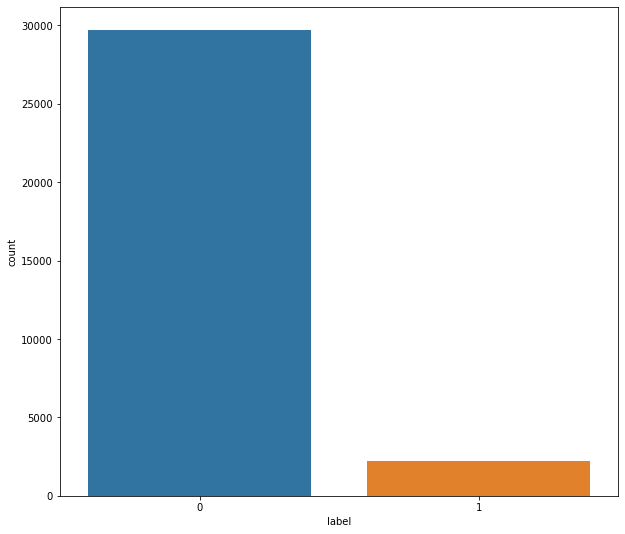

In [197]:
plt.figure(figsize=(10,9))
sns.countplot(x='label', data=df)
plt.show()

- It is evident that positive tweets are the majority in the dataset.

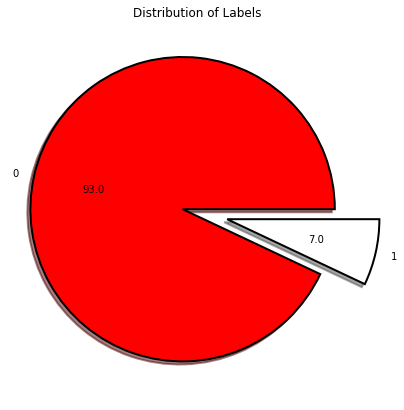

In [198]:
fig = plt.figure(figsize=(7,7))
colors = ("red","white")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['label'].value_counts()
explode = (0.1,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Labels')
plt.show()

# Data Preprocessing

In [199]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [200]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [201]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [202]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [203]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [204]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [205]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [206]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [207]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Visulization After Preprossing

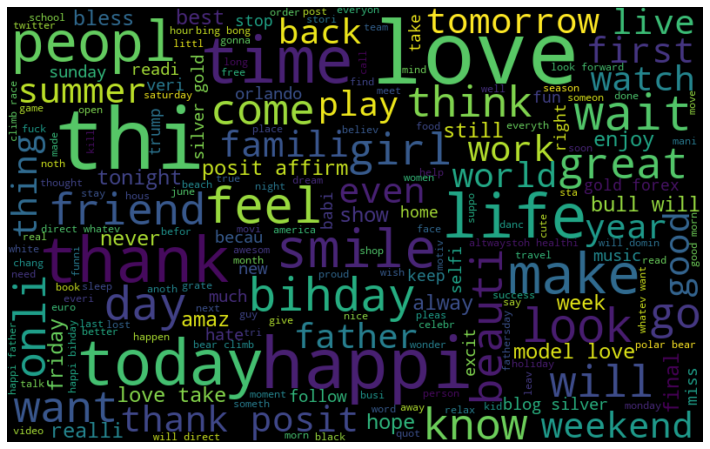

In [208]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

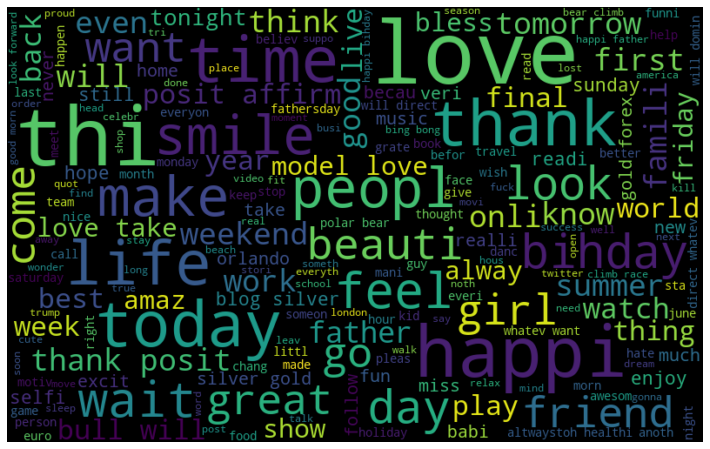

In [209]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

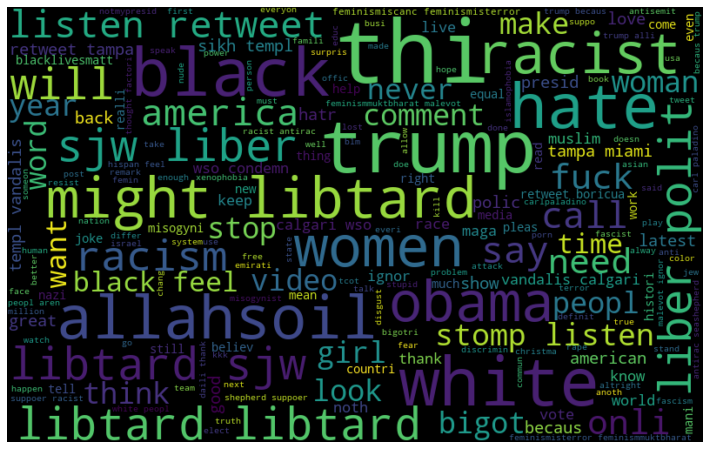

In [210]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [211]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [212]:
# extract hashtags from non-racist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [213]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [214]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [215]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [216]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [217]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


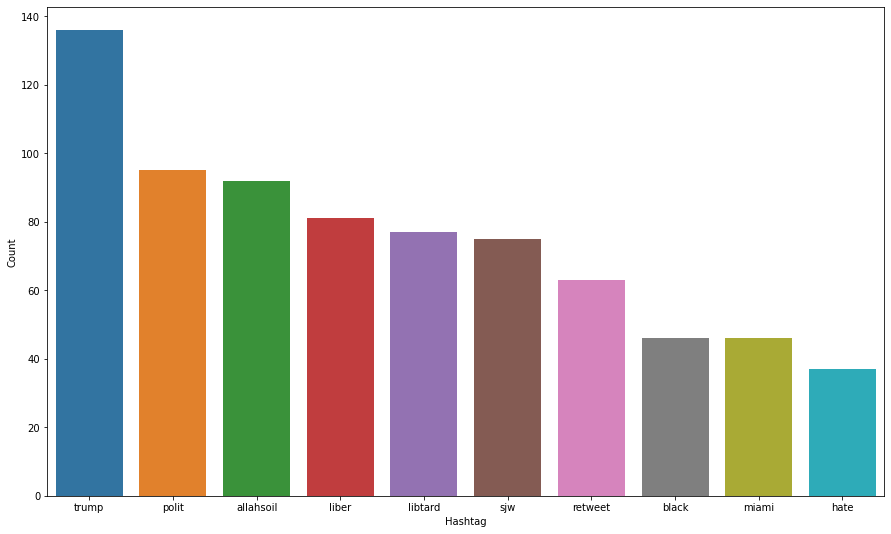

In [218]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

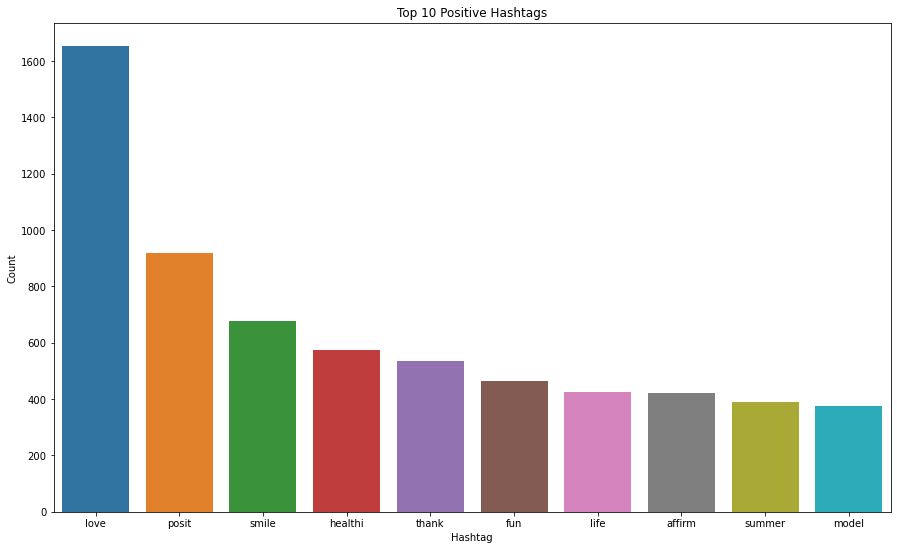

In [219]:
# select top 10 Positive hashtags
freq_positive = nltk.FreqDist(ht_positive)
d_positive = pd.DataFrame({'Hashtag': list(freq_positive.keys()),
                            'Count': list(freq_positive.values())})

# Select top 10 positive hashtags
d_positive = d_positive.nlargest(columns='Count', n=10)

# Plot the graph for positive hashtags
plt.figure(figsize=(15, 9))
sns.barplot(data=d_positive, x='Hashtag', y='Count')
plt.title('Top 10 Positive Hashtags')
plt.show()

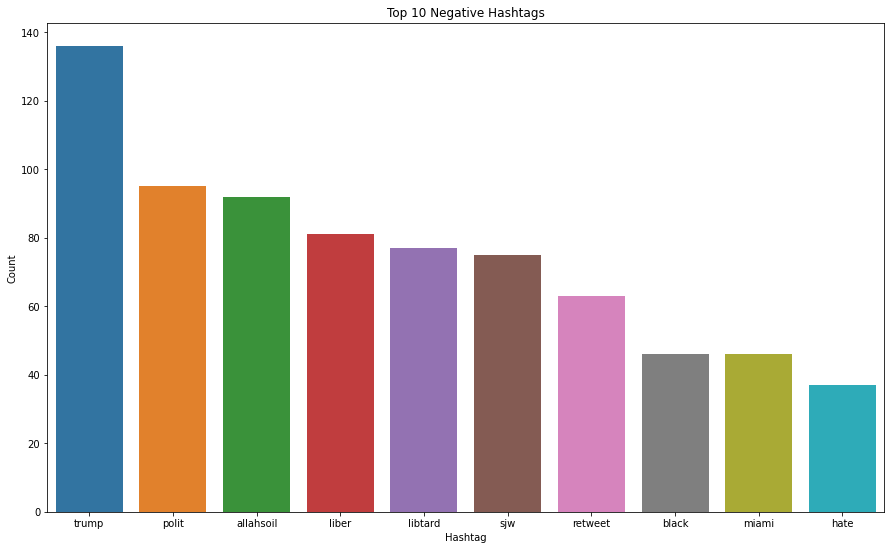

In [220]:
# select top 10 negative hashtags
freq_negative = nltk.FreqDist(ht_negative)
d_negative = pd.DataFrame({'Hashtag': list(freq_negative.keys()),
                            'Count': list(freq_negative.values())})

# Select top 10 negative hashtags
d_negative = d_negative.nlargest(columns='Count', n=10)

# Plot the graph for negative hashtags
plt.figure(figsize=(15, 9))
sns.barplot(data=d_negative, x='Hashtag', y='Count')
plt.title('Top 10 Negative Hashtags')
plt.show()


# Splitting Data Into Train And Test

In [221]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Model Traninig

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [224]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [225]:
# testing
pred = model.predict(x_test)

In [226]:
accuracy_score(y_test,pred)

0.9469403078463271

# Testing The Model

In [228]:
import tkinter as tk
from tkinter import messagebox

def classify_sentence():
    new_sentence = entry.get()
    vectorized_sentence = bow_vectorizer.transform([new_sentence])
    prediction = model.predict(vectorized_sentence)

    if prediction == 1:
        result_label.config(text="The sentence contains racist words.")
    else:
        result_label.config(text="The sentence does not contain racist words.")

# Create the main window
window = tk.Tk()
window.title("Sentence Classification")
window.geometry("500x300")  

# Create GUI elements
label = tk.Label(window, text="Enter a sentence:")
entry = tk.Entry(window, width=40)
classify_button = tk.Button(window, text="Classify", command=classify_sentence)
result_label = tk.Label(window, text="Result will be shown here.")

# Arrange GUI elements
label.pack(pady=10)
entry.pack(pady=10)
classify_button.pack(pady=10)
result_label.pack(pady=10)

# Start the GUI loop
window.mainloop()
